In [1]:
# Data Analysis Robusta Coffee Price 
from bs4 import BeautifulSoup
import requests
import pandas
import numpy
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#data exporting
ds = pandas.read_html("https://www.indexmundi.com/commodities/?commodity=robusta-coffee&months=60")
print(ds[1])

       Month  Price  Change
0   Jul 2017   2.31       -
1   Aug 2017   2.30  -0.43%
2   Sep 2017   2.19  -4.78%
3   Oct 2017   2.17  -0.91%
4   Nov 2017   2.01  -7.37%
5   Dec 2017   1.93  -3.98%
6   Jan 2018   1.95   1.04%
7   Feb 2018   1.97   1.03%
8   Mar 2018   1.94  -1.52%
9   Apr 2018   1.95   0.52%
10  May 2018   1.96   0.51%
11  Jun 2018   1.90  -3.06%
12  Jul 2018   1.86  -2.11%
13  Aug 2018   1.78  -4.30%
14  Sep 2018   1.69  -5.06%
15  Oct 2018   1.88  11.24%
16  Nov 2018   1.84  -2.13%
17  Dec 2018   1.71  -7.07%
18  Jan 2019   1.72   0.58%
19  Feb 2019   1.73   0.58%
20  Mar 2019   1.70  -1.73%
21  Apr 2019   1.62  -4.71%
22  May 2019   1.57  -3.09%
23  Jun 2019   1.63   3.82%
24  Jul 2019   1.63   0.00%
25  Aug 2019   1.56  -4.29%
26  Sep 2019   1.56   0.00%
27  Oct 2019   1.51  -3.21%
28  Nov 2019   1.62   7.28%
29  Dec 2019   1.61  -0.62%
30  Jan 2020   1.56  -3.11%
31  Feb 2020   1.50  -3.85%
32  Mar 2020   1.49  -0.67%
33  Apr 2020   1.41  -5.37%
34  May 2020   1.42 

In [63]:
#dividing the month of a data column into two different columns to work properly
ds[1]['Months'] = ds[1]['Month'].map(lambda x:x. split(' ')[0])
ds[1]['Years'] = ds[1]['Month'].map(lambda x:x. split(' ')[1])

In [64]:
ds[1]

,Month,Price,Change,Months,Years
0,Jul 2017,2.31,-,Jul,2017
1,Aug 2017,2.30,-0.43%,Aug,2017
2,Sep 2017,2.19,-4.78%,Sep,2017
3,Oct 2017,2.17,-0.91%,Oct,2017
4,Nov 2017,2.01,-7.37%,Nov,2017
5,Dec 2017,1.93,-3.98%,Dec,2017
6,Jan 2018,1.95,1.04%,Jan,2018
7,Feb 2018,1.97,1.03%,Feb,2018
8,Mar 2018,1.94,-1.52%,Mar,2018
9,Apr 2018,1.95,0.52%,Apr,2018


In [65]:
#now we can clearly see all the data
ds[1].head()

,Month,Price,Change,Months,Years
0,Jul 2017,2.31,-,Jul,2017
1,Aug 2017,2.30,-0.43%,Aug,2017
2,Sep 2017,2.19,-4.78%,Sep,2017
3,Oct 2017,2.17,-0.91%,Oct,2017
4,Nov 2017,2.01,-7.37%,Nov,2017


In [6]:
#Here we see that we are analyzing 60 months and the average price of Robusta coffee was $1.85.
ds[1].describe()

,Price
count,60.000000
mean,1.845833
std,0.312211
min,1.410000
25%,1.600000
50%,1.745000
75%,2.085000
max,2.480000


In [7]:
# The maximum price of coffee was in September 2021, rounded up to 2.48.
ds[1].max()

Month     Sep 2021
Price         2.48
Change       7.38%
Months         Sep
Years         2022
dtype: object

In [8]:
#Coffee price low was 1.41 in April 2018.
ds[1].min()

Month     Apr 2018
Price         1.41
Change           -
Months         Apr
Years         2017
dtype: object

In [10]:
# We don't need to remove null values because we have complete data
ds[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   60 non-null     object 
 1   Price   60 non-null     float64
 2   Change  60 non-null     object 
 3   Months  60 non-null     object 
 4   Years   60 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


In [15]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [70]:
import missingno as msno

In [71]:
ds = pandas.read_html("https://www.indexmundi.com/commodities/?commodity=robusta-coffee&months=60")
print(ds[1])

       Month  Price  Change
0   Jul 2017   2.31       -
1   Aug 2017   2.30  -0.43%
2   Sep 2017   2.19  -4.78%
3   Oct 2017   2.17  -0.91%
4   Nov 2017   2.01  -7.37%
5   Dec 2017   1.93  -3.98%
6   Jan 2018   1.95   1.04%
7   Feb 2018   1.97   1.03%
8   Mar 2018   1.94  -1.52%
9   Apr 2018   1.95   0.52%
10  May 2018   1.96   0.51%
11  Jun 2018   1.90  -3.06%
12  Jul 2018   1.86  -2.11%
13  Aug 2018   1.78  -4.30%
14  Sep 2018   1.69  -5.06%
15  Oct 2018   1.88  11.24%
16  Nov 2018   1.84  -2.13%
17  Dec 2018   1.71  -7.07%
18  Jan 2019   1.72   0.58%
19  Feb 2019   1.73   0.58%
20  Mar 2019   1.70  -1.73%
21  Apr 2019   1.62  -4.71%
22  May 2019   1.57  -3.09%
23  Jun 2019   1.63   3.82%
24  Jul 2019   1.63   0.00%
25  Aug 2019   1.56  -4.29%
26  Sep 2019   1.56   0.00%
27  Oct 2019   1.51  -3.21%
28  Nov 2019   1.62   7.28%
29  Dec 2019   1.61  -0.62%
30  Jan 2020   1.56  -3.11%
31  Feb 2020   1.50  -3.85%
32  Mar 2020   1.49  -0.67%
33  Apr 2020   1.41  -5.37%
34  May 2020   1.42 

In [72]:
ds[1].describe()

,Price
count,60.000000
mean,1.845833
std,0.312211
min,1.410000
25%,1.600000
50%,1.745000
75%,2.085000
max,2.480000


In [73]:
ds[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   60 non-null     object 
 1   Price   60 non-null     float64
 2   Change  60 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


In [74]:
ds[1].isna().sum()

Month     0
Price     0
Change    0
dtype: int64

<AxesSubplot:>

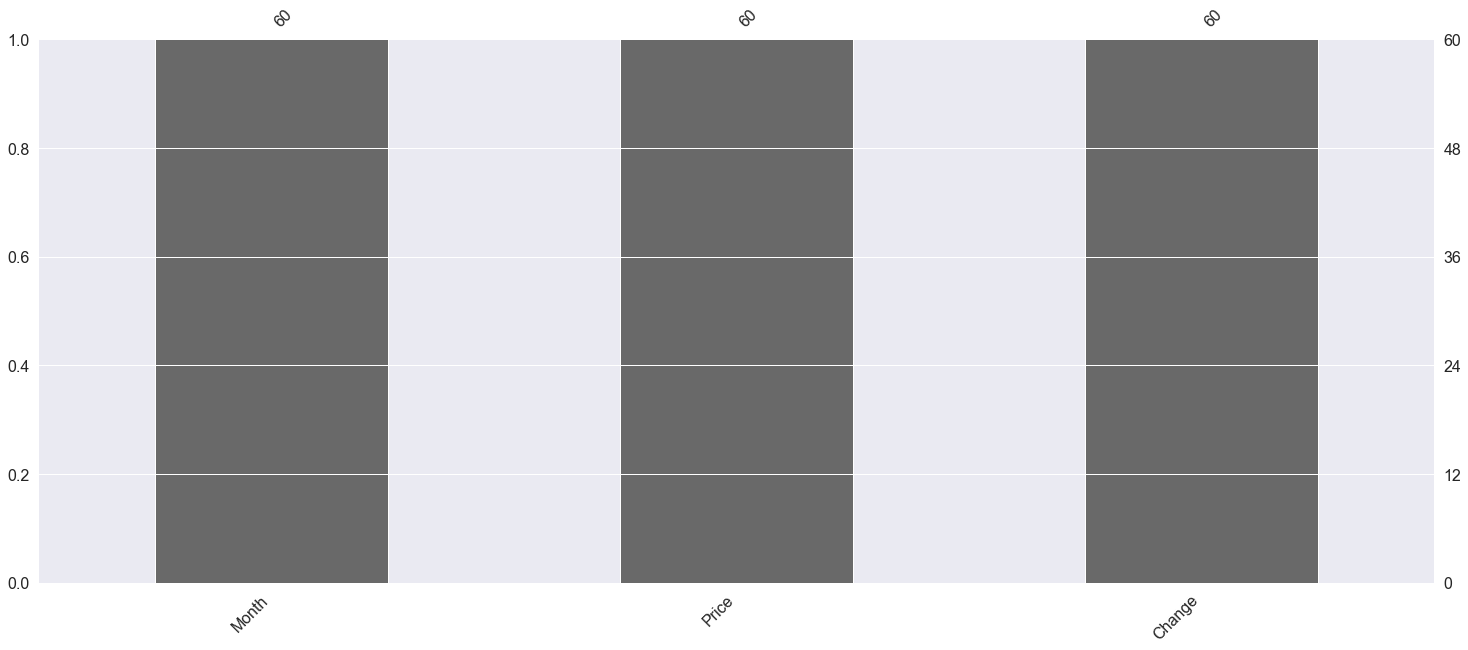

In [76]:
msno.bar(ds[1])

<AxesSubplot:>

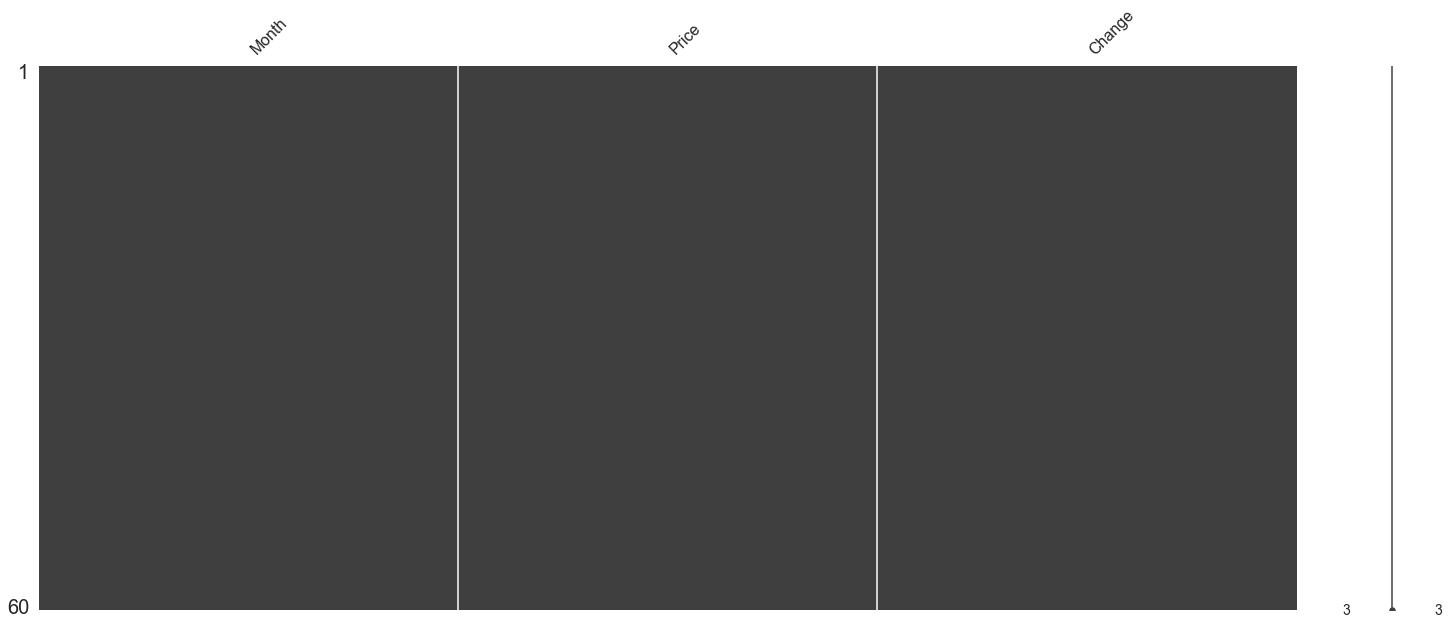

In [77]:
msno.matrix(ds[1])

<AxesSubplot:>

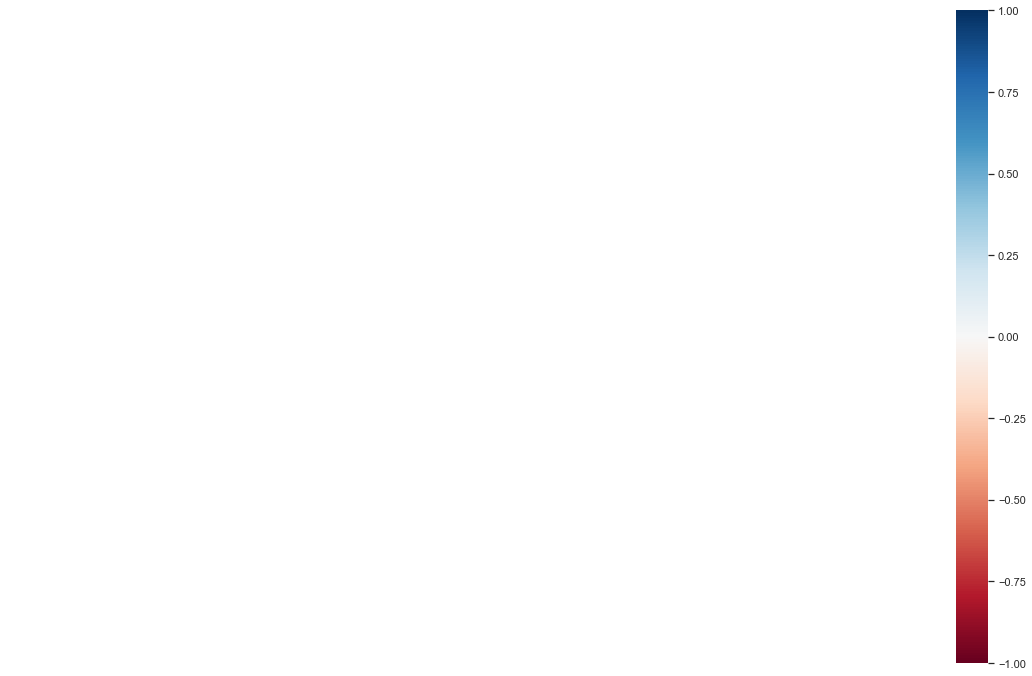

In [78]:
msno.heatmap(ds[1])

<AxesSubplot:>

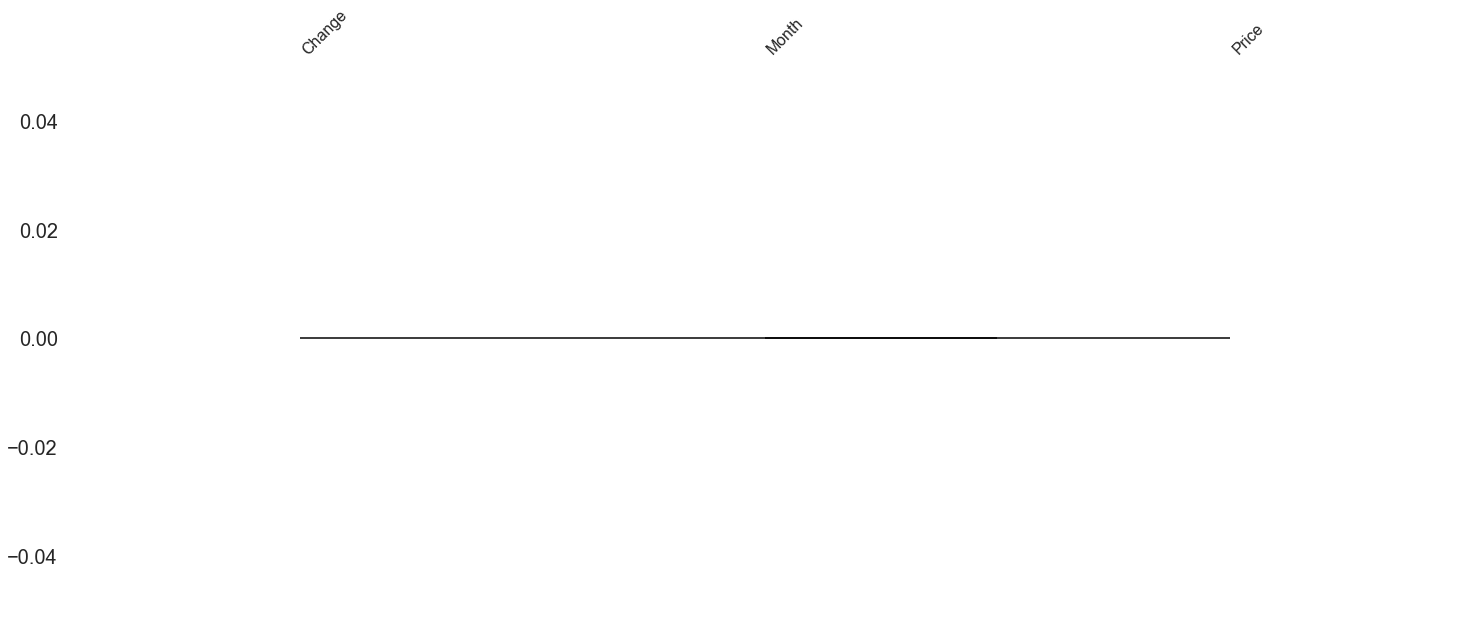

In [79]:
msno.dendrogram(ds[1])

In [14]:
missing_columns = [col for col in ds[1].columns if ds[1][col].isnull().sum() > 0]
missing_columns

[]

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

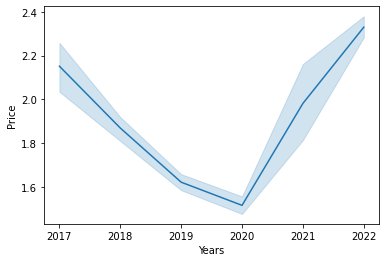

In [16]:
sns.lineplot(x=ds[1]["Years"], y=ds[1]["Price"]);

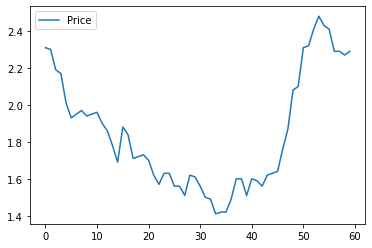

In [17]:
ds[1].plot(kind='line');

In [18]:
sns.set(rc={"figure.figsize":(9, 5)})

After analyzing the time series charts, we can say that there is no possibility, namely, it is difficult to single out any seasonal fluctuations, but there are small ups and downs caused by price volatility in the commodity market. And also, it is worth noting that there is a clear positive trend, as the value of the index becomes generally larger over time, despite fluctuations.

Robusta prices have fallen by 9% this year (compared to the average price in 2019). The weakness reflects rising exports from Vietnam, the world's second largest coffee supplier. Robusta prices are expected to decline by more than 7% in 2020, followed by a slight increase in 2021.

<AxesSubplot:xlabel='Years', ylabel='Price'>

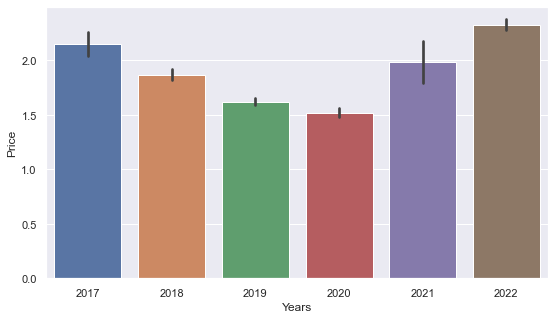

In [19]:
sns.barplot(x=ds[1]["Years"], y=ds[1]["Price"])

<AxesSubplot:xlabel='Years', ylabel='Months'>

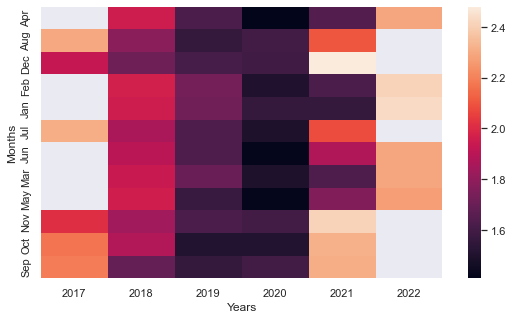

In [20]:
ds[1] = ds[1].pivot('Months', 'Years', 'Price') 

sns.heatmap(ds[1])

Here we can see that in 2019 and 2020 robusta coffee prices were significantly low relative to other periods and we can see here that starting from the last month of Q3 2021, coffee prices are rising.

In [21]:
ds[1].tail

<bound method NDFrame.tail of Years   2017  2018  2019  2020  2021  2022
Months                                    
Apr      NaN  1.95  1.62  1.41  1.64  2.29
Aug     2.30  1.78  1.56  1.60  2.10   NaN
Dec     1.93  1.71  1.61  1.59  2.48   NaN
Feb      NaN  1.97  1.73  1.50  1.62  2.41
Jan      NaN  1.95  1.72  1.56  1.56  2.43
Jul     2.31  1.86  1.63  1.49  2.08   NaN
Jun      NaN  1.90  1.63  1.42  1.87  2.29
Mar      NaN  1.94  1.70  1.49  1.63  2.29
May      NaN  1.96  1.57  1.42  1.76  2.27
Nov     2.01  1.84  1.62  1.60  2.41   NaN
Oct     2.17  1.88  1.51  1.51  2.32   NaN
Sep     2.19  1.69  1.56  1.60  2.31   NaN>

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

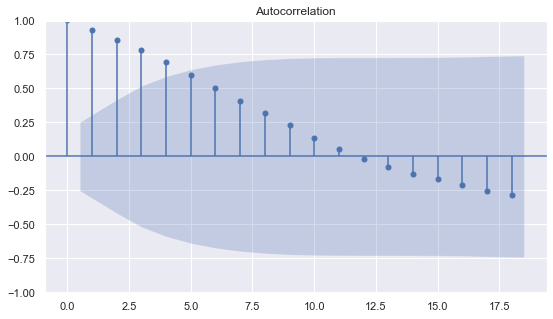

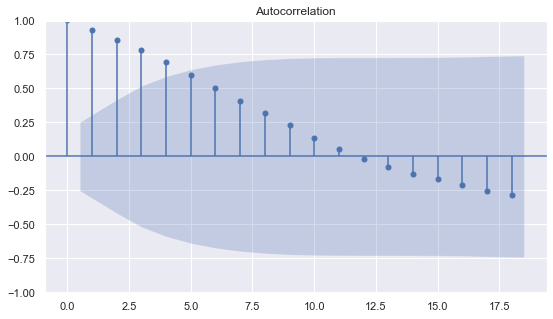

In [26]:
plot_acf(ds[1].Price)

In [27]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
ds = pandas.read_html("https://www.indexmundi.com/commodities/?commodity=robusta-coffee&months=60")

In [31]:
ds[1]

,Month,Price,Change
0,Jul 2017,2.31,-
1,Aug 2017,2.30,-0.43%
2,Sep 2017,2.19,-4.78%
3,Oct 2017,2.17,-0.91%
4,Nov 2017,2.01,-7.37%
5,Dec 2017,1.93,-3.98%
6,Jan 2018,1.95,1.04%
7,Feb 2018,1.97,1.03%
8,Mar 2018,1.94,-1.52%
9,Apr 2018,1.95,0.52%


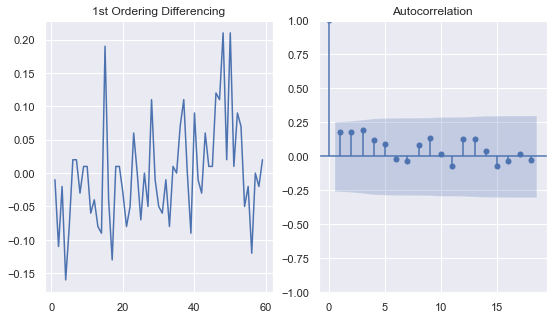

In [29]:
f=plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Ordering Differencing')
ax1.plot(ds[1].Price.diff())

ax2 = f.add_subplot(122)
plot_acf(ds[1].Price.diff().dropna(), ax=ax2)
plt.show()

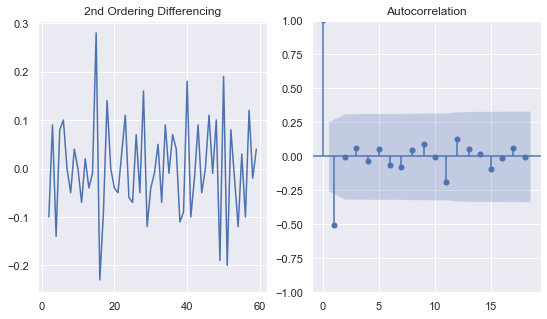

In [30]:
f=plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Ordering Differencing')
ax1.plot(ds[1].Price.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(ds[1].Price.diff().diff().dropna(), ax=ax2)
plt.show()

After analyzing the autocorrelation graphs of the function, we cannot assume that there is a trend. Due to the fact that autocorrelation decay graphs do not decrease monotonically and vice versa. And also that the graph of the partial autocorrelation function has a pronounced value in the first period, as well as peaks of high values near the zero frequencies of the periodogram graph.

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ds[1].Price.dropna())
print('p-value:',result[1])

result = adfuller(ds[1].Price.diff().dropna())
print('p-value:',result[1])

result = adfuller(ds[1].Price.diff().diff().dropna())
print('p-value:',result[1])

p-value: 0.7502940726742173
p-value: 4.3458052705247217e-08
p-value: 9.62182783215141e-10


In [52]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


pipi install statsmodels

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(ds[1].Price, order=(1,1,2))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   60
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  69.745
Date:                Thu, 18 Aug 2022   AIC                           -131.490
Time:                        21:58:10   BIC                           -123.180
Sample:                             0   HQIC                          -128.246
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7480      0.301      2.484      0.013       0.158       1.338
ma.L1         -0.6420      0.331     -1.938      0.053      -1.291       0.007
ma.L2          0.0977      0.159      0.616      0.5

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,3 ARIMA Model
model = ARIMA(ds[1].Price, order=(1,1,3))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   60
Model:                 ARIMA(1, 1, 3)   Log Likelihood                  70.042
Date:                Thu, 18 Aug 2022   AIC                           -130.084
Time:                        21:58:14   BIC                           -119.696
Sample:                             0   HQIC                          -126.029
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4997      0.601      0.832      0.405      -0.677       1.677
ma.L1         -0.3967      0.615     -0.645      0.519      -1.603       0.810
ma.L2          0.0930      0.143      0.649      0.5

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,4 ARIMA Model
model = ARIMA(ds[1].Price, order=(1,1,4))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   60
Model:                 ARIMA(1, 1, 4)   Log Likelihood                  70.132
Date:                Thu, 18 Aug 2022   AIC                           -128.264
Time:                        21:58:16   BIC                           -115.799
Sample:                             0   HQIC                          -123.398
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      1.360      0.184      0.854      -2.415       2.915
ma.L1         -0.1471      1.397     -0.105      0.916      -2.885       2.591
ma.L2          0.1288      0.165      0.779      0.4

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(ds[1].Price, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   60
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  69.745
Date:                Thu, 18 Aug 2022   AIC                           -131.490
Time:                        21:59:27   BIC                           -123.180
Sample:                             0   HQIC                          -128.246
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7480      0.301      2.484      0.013       0.158       1.338
ma.L1         -0.6420      0.331     -1.938      0.053      -1.291       0.007
ma.L2          0.0977      0.159      0.616      0.5

In [39]:
# 1,1,1 ARIMA Model
model = ARIMA(ds[1].Price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  69.591
Date:                Thu, 18 Aug 2022   AIC                           -133.181
Time:                        22:00:11   BIC                           -126.948
Sample:                             0   HQIC                          -130.748
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8333      0.231      3.606      0.000       0.380       1.286
ma.L1         -0.6818      0.319     -2.136      0.033      -1.307      -0.056
sigma2         0.0055      0.001      6.043      0.0

In [45]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 715kB/s eta 0:00:01
  Found existing installation: statsmodels 0.13.0
    Uninstalling statsmodels-0.13.0:
      Successfully uninstalled statsmodels-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Years'>

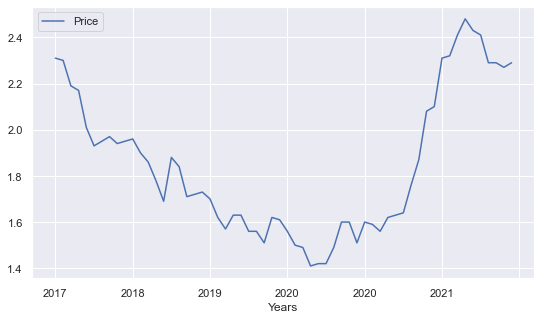

In [75]:
ds[1].plot(x='Years', y='Price', xlim=(2018-2021))

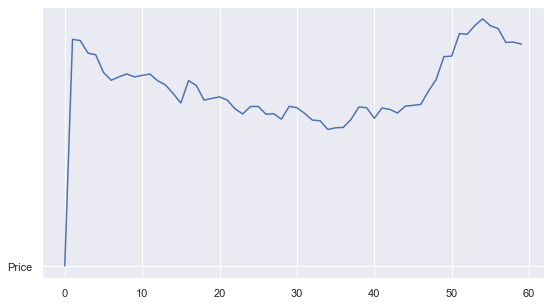

In [166]:
predict=model_fit.predict(typ='levels')
plt.plot(predict)
plt.plot('Price')

In [180]:
conda install statsmodels

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37hecd8cb5_0         900 KB
    ------------------------------------------------------------
                                           Total:         900 KB

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.13.0-py37hecd8cb5_0



conda-4.13.0         | 900 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install pandas --upgrade

     |████████████████████████████████| 11.0MB 2.7MB/s eta 0:00:01
  Found existing installation: pandas 1.3.0
    Uninstalling pandas-1.3.0:
      Successfully uninstalled pandas-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [94]:
from pandas.plotting import autocorrelation_plot

In [80]:
import pandas as pd

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

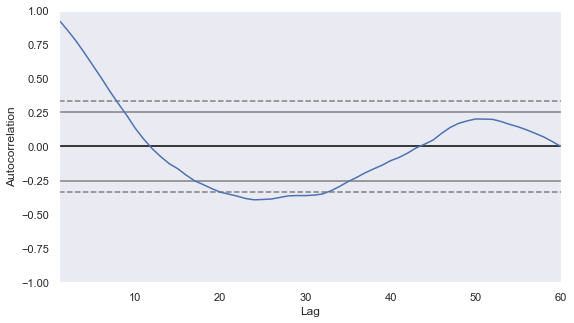

In [97]:
pandas.plotting.autocorrelation_plot(ds[1]['Price'])

The fact that the blue line goes beyond the horizontal gray lines indicates that this is a non-stationary time series with a correlation structure. For my purposes here, I'm not interested in fitting the model to the data. Instead, I just want to know more about the length of a typical price cycle. In this case, viewing the autocorrelation function of the time series in the frequency domain rather than the time domain helps.

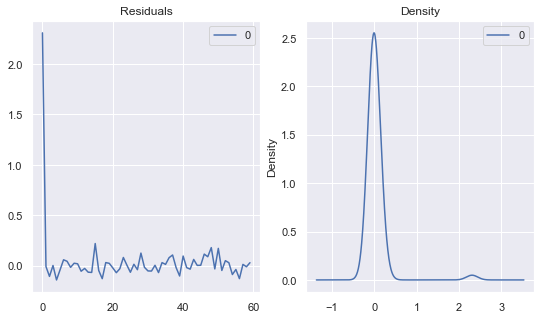

In [135]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Results: This sample allows us to evaluate price changes, but not so deeply due to the fact that there are very few variables. But we can say that there is a trend, initially it was slowly decreasing, but then slowly increasing. These prices are influenced by production factors, that is, the more the production of this type of coffee, the lower the price will be, and the price of coffee fell, respectively, this was due to Vietnam. The increase in prices began because the weather conditions in Brazil ruined the harvest. The next 2-3 years, the price will mainly rise. And here it is worth paying attention, yes, there will be more production, now Colombia is also starting to produce this type of coffee, but the demand will be large due to the fact that this type of coffee is inexpensive. In China, people began to live better and the middle class became larger, and there will also be a greater need for this type of coffee. Also, Robusta is the most sensitive to temperature, so the risk that there may be a shortage of this product is also great.